<a href="https://colab.research.google.com/github/NoahStefancik-UR/CSC241_Assignments/blob/main/CSC241_Assignment5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Noah Stefancik Undergrad

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving IMG_0543.jpeg to IMG_0543.jpeg
Saving IMG_0544.jpeg to IMG_0544.jpeg
Saving IMG_0545.jpeg to IMG_0545.jpeg


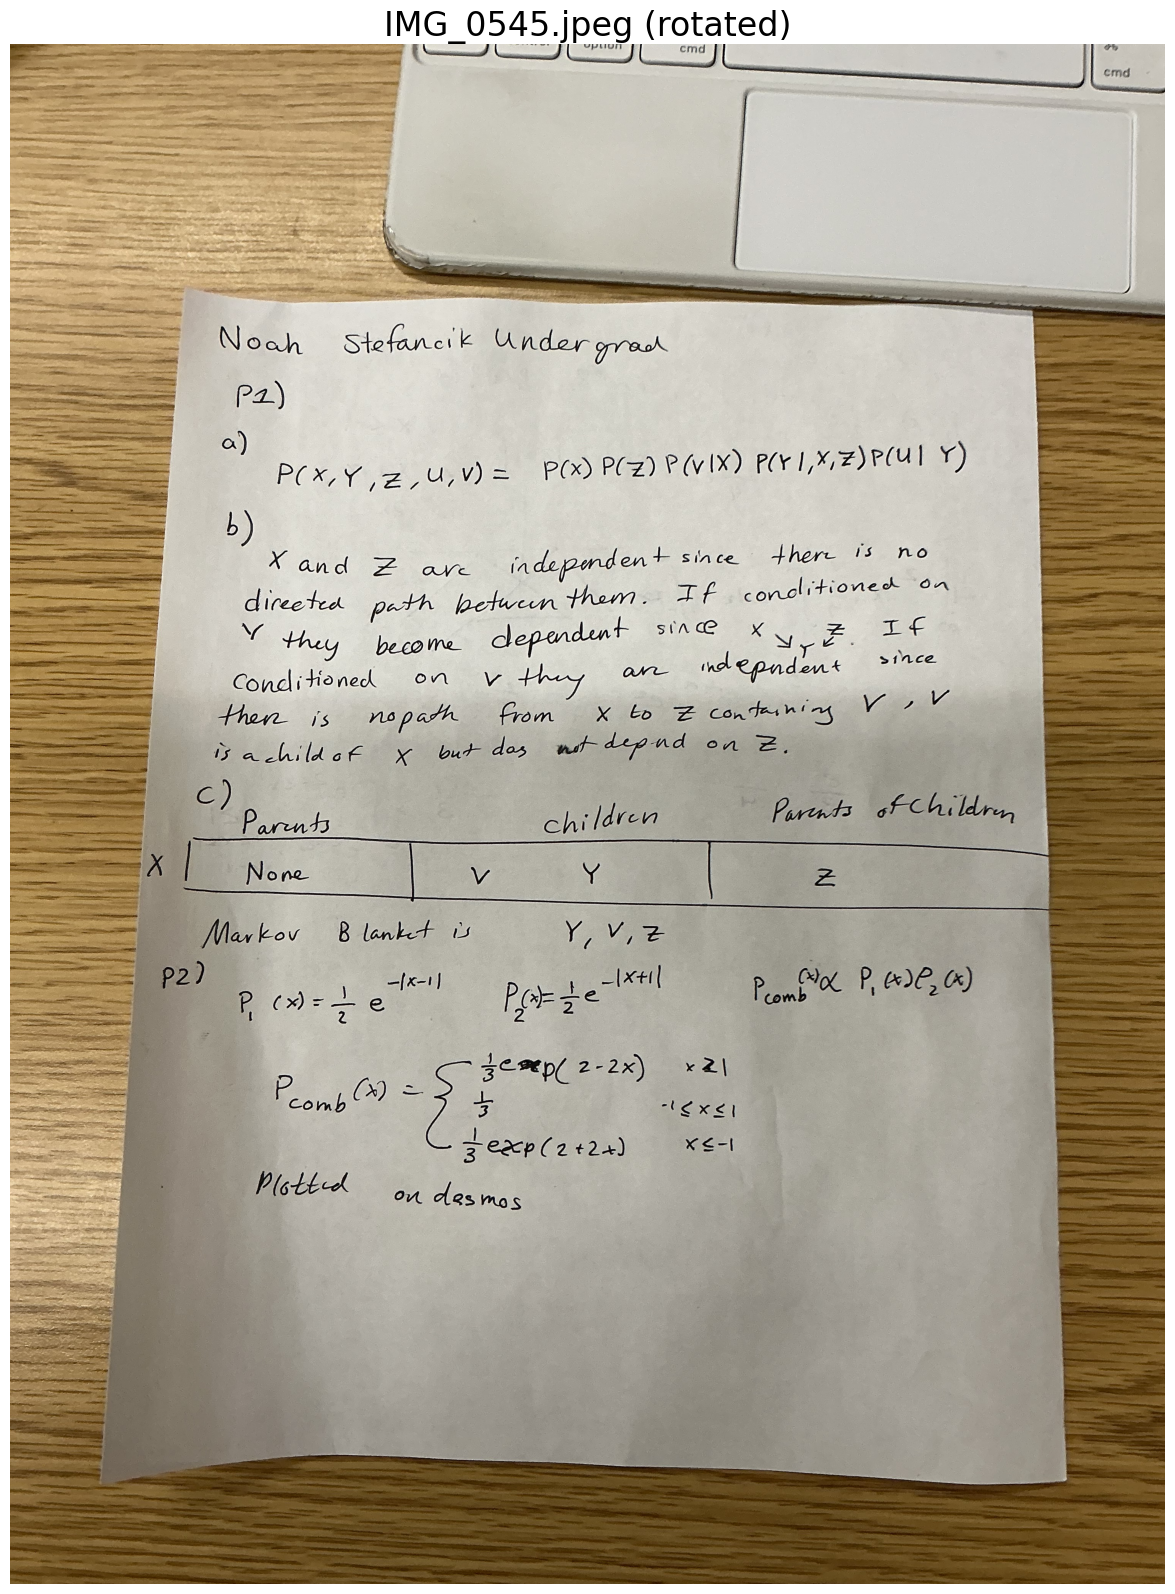

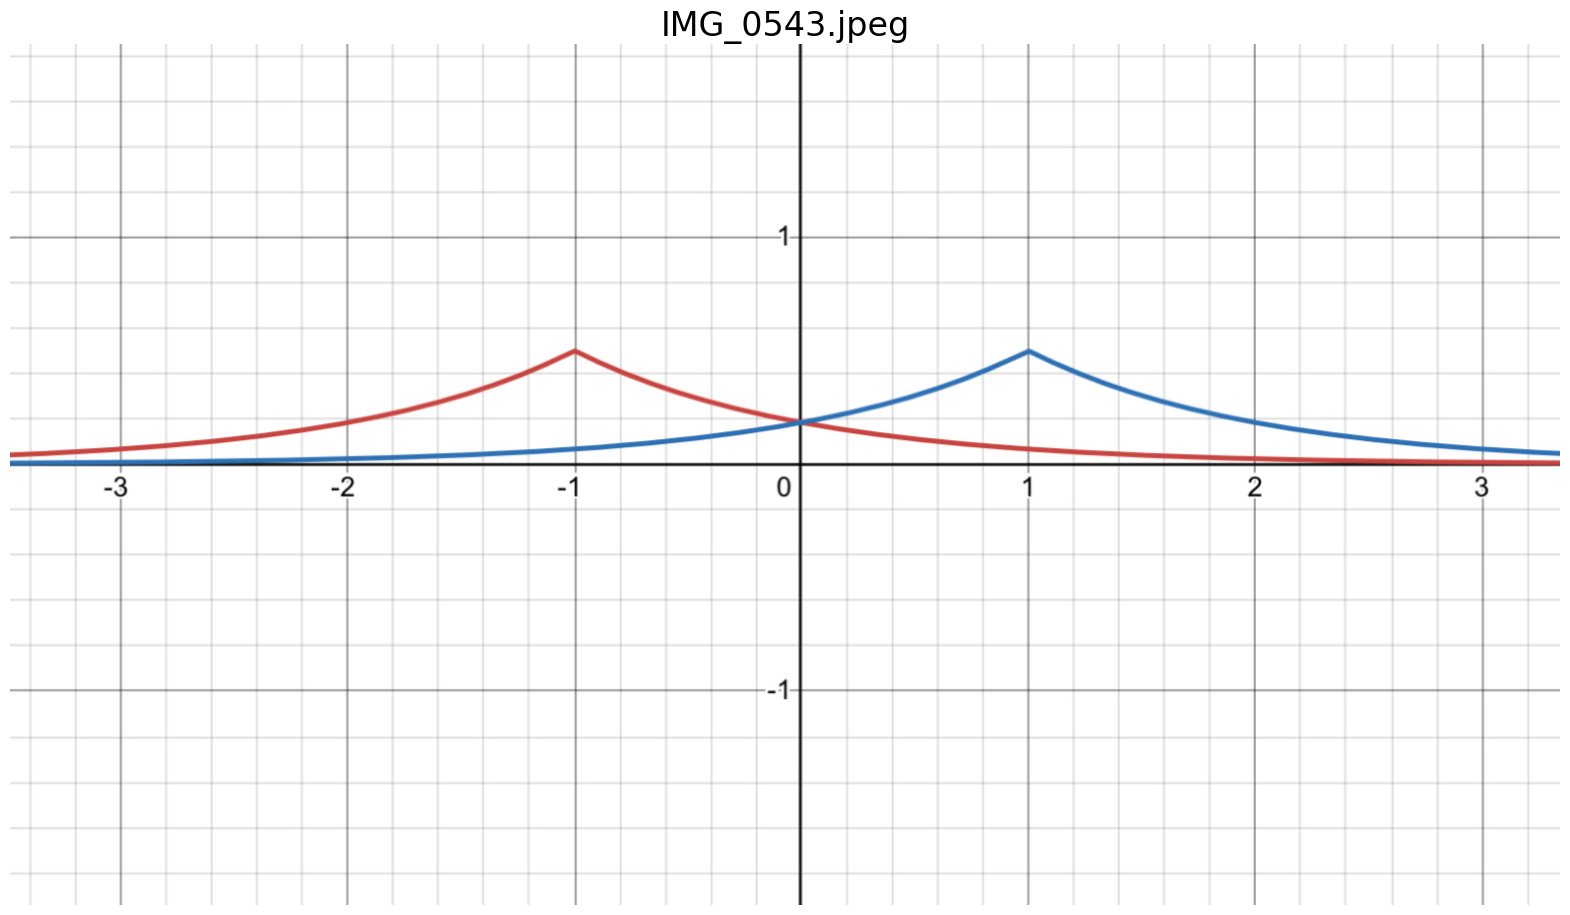

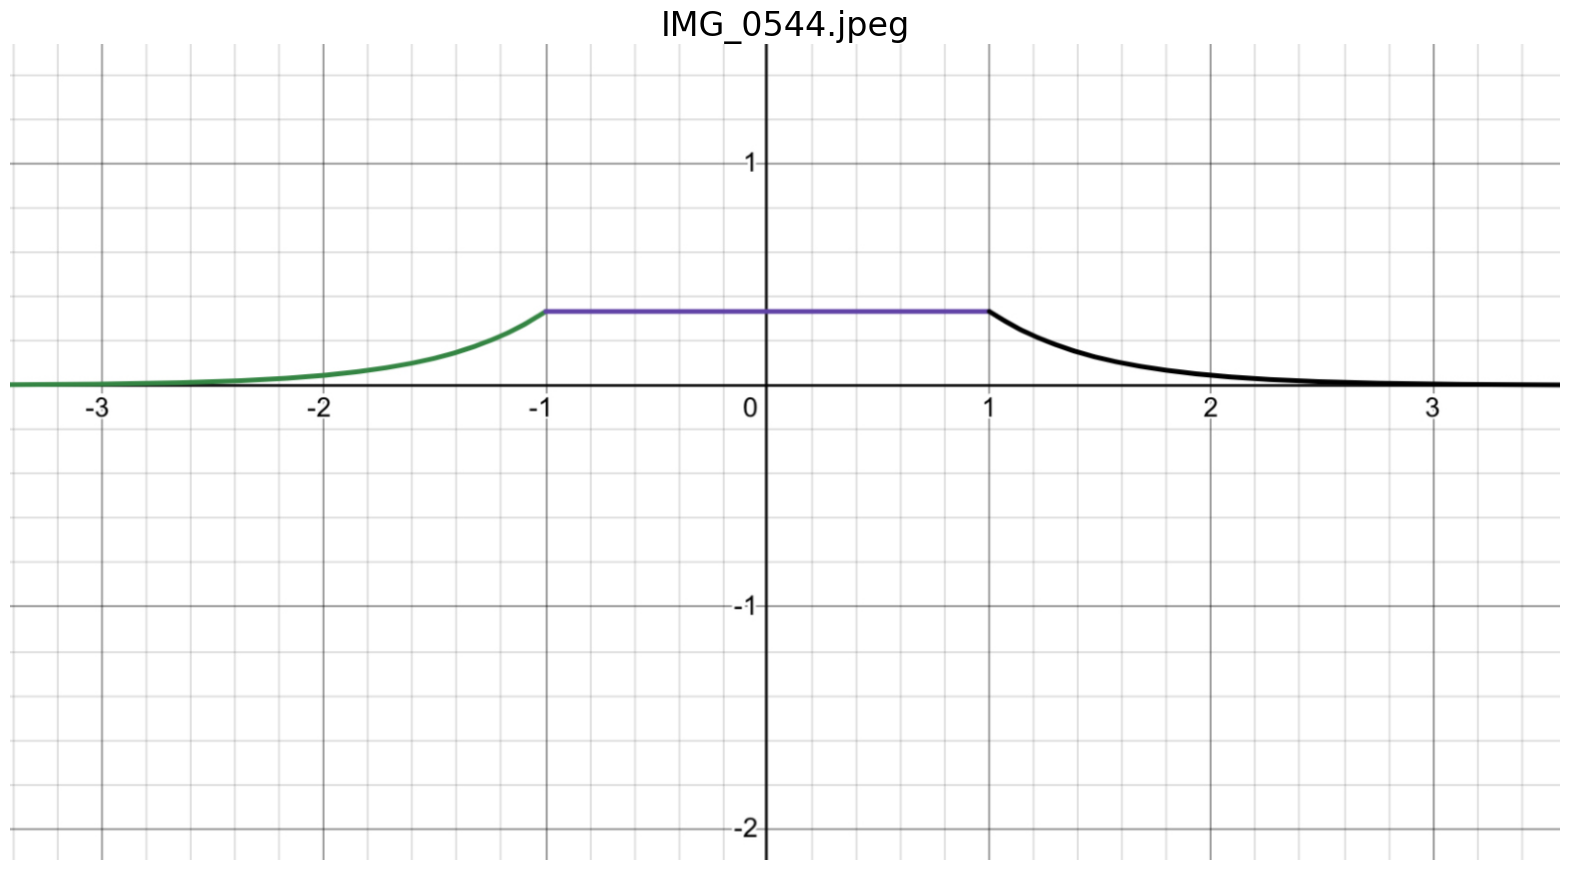

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image

# Filenames
fnames = ["IMG_0543.jpeg", "IMG_0544.jpeg", "IMG_0545.jpeg"]

# Load images
img2 = Image.open(fnames[0])
img3 = Image.open(fnames[1])
img1 = Image.open(fnames[2]).rotate(-90, expand=True)   # rotate 90° right

# --- IMAGE 1 (rotated third file)
plt.figure(figsize=(20, 20))     # make it big
plt.imshow(img1)
plt.axis('off')
plt.title(f"{fnames[2]} (rotated)", fontsize=24)
plt.show()

# --- IMAGE 2
plt.figure(figsize=(20, 20))
plt.imshow(img2)
plt.axis('off')
plt.title(fnames[0], fontsize=24)
plt.show()

# --- IMAGE 3
plt.figure(figsize=(20, 20))
plt.imshow(img3)
plt.axis('off')
plt.title(fnames[1], fontsize=24)
plt.show()


Question 1.)

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving pfs.npy to pfs.npy


In [ ]:
import numpy as np

PFs = np.load(list(uploaded.keys())[0])
PFs.shape

(64, 8, 8)

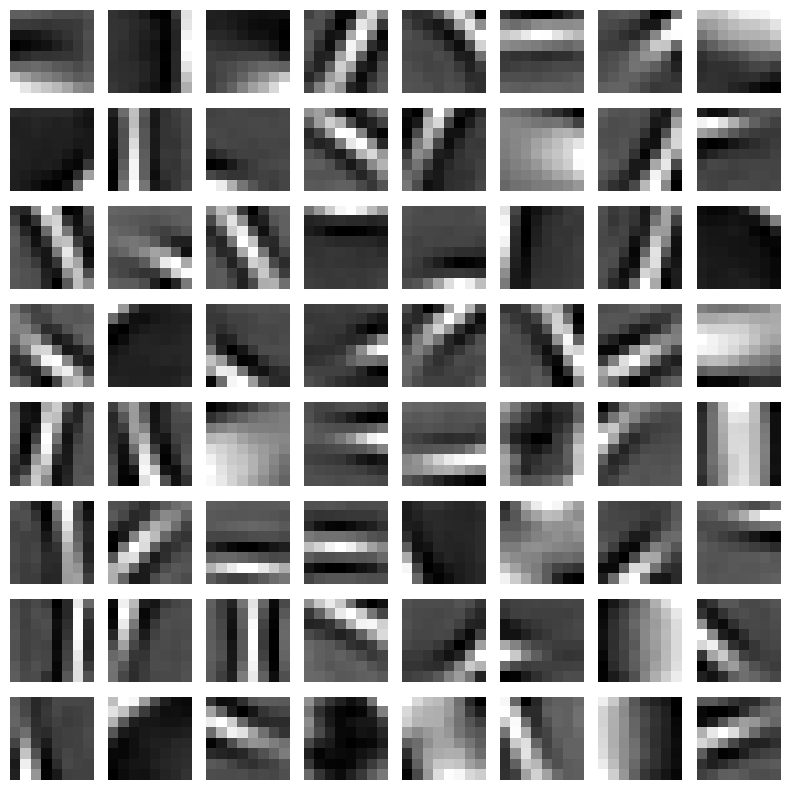

In [ ]:
import matplotlib.pyplot as plt

num_fields = PFs.shape[0]

plt.figure(figsize=(8, 8))

for i in range(num_fields):
    plt.subplot(8, 8, i + 1)
    plt.imshow(PFs[i], cmap='gray')
    plt.axis('off')

plt.tight_layout()
plt.show()

Question 2.)

\begin{align*}
  p(r_k = 1 \mid I, r_{\neg k})
  &= \frac{p(r_k = 1)p(I \mid r_{\neg k}, r_k = 1)}{p(r_k = 0)p(I \mid r_{\neg k}, r_k = 0)+ p(r_k = 1)p(I \mid r_{\neg k}, r_k = 1)}
\end{align*}


Question 3.)

In [ ]:
p_prior = 0.04
def gibbs_sampler(I, PFs, n_samples):
    n_neurons = PFs.shape[0]
    n_pixels_flat = PFs.shape[1] * PFs.shape[2]

    PFs_flat = PFs.reshape(n_neurons, n_pixels_flat)
    I_flat = I.reshape(n_pixels_flat)

    r_current = np.random.binomial(1, p_prior, size=n_neurons)
    r_samples = np.zeros((n_samples, n_neurons))

    for t in range(n_samples):
        r_new = r_current.copy()

        for k in range(n_neurons):
            I_res = I_flat.copy()
            for i in range(n_neurons):
                if i != k:
                    I_res -= PFs_flat[i] * r_new[i]

            I_res = I_res.reshape(8,8)
            PF_k_matrix = PFs[k]
            sum_1 = np.sum((I_res - PF_k_matrix) ** 2)
            sum_0 = np.sum(I_res ** 2)

            sum = np.exp(-5 * (sum_1 - sum_0))

            sum = sum * (p_prior / (1 - p_prior))

            p_k = sum / (1 + sum)

            r_new[k] = np.random.binomial(1, p_k)

        r_samples[t] = r_new
        r_current = r_new

    return r_samples

4.)

In [ ]:
def compute_marginal_posterior(r_samples):
    return np.mean(r_samples, axis=0)


5.)

In [ ]:
def run_test_with_pf(PFs, I_observed, samples):
    r_samples = gibbs_sampler(I_observed, PFs, n_samples=samples)
    return r_samples, I_observed


In [ ]:
import matplotlib.pyplot as plt

def plot_raster(r_samples, dt=5):
    n_samples, n_neurons = r_samples.shape
    time_ms = np.arange(n_samples) * dt

    plt.figure(figsize=(12, 8))

    for neuron_idx in range(n_neurons):
        spike_times = time_ms[r_samples[:, neuron_idx] == 1]
        plt.scatter(spike_times,
                   np.ones_like(spike_times)*neuron_idx,
                   color='black', s=3, marker='|')

    plt.xlabel("Time (ms)")
    plt.ylabel("Neuron index")
    plt.title("Raster Plot of Gibbs Samples")
    plt.ylim(-1, n_neurons)
    plt.show()


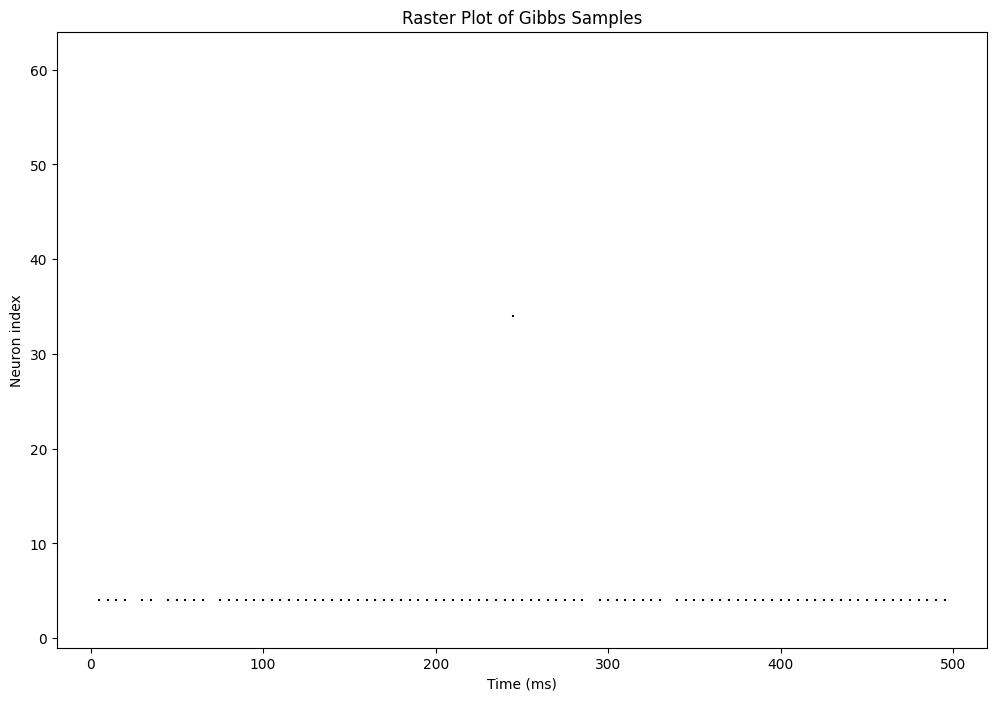

Marginals
[0.   0.   0.   0.   0.94 0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.01 0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.  ]


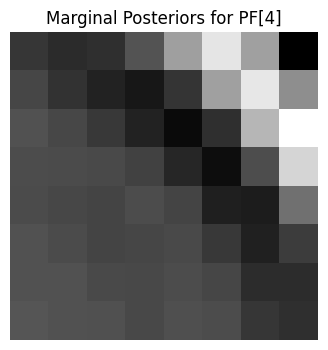

In [ ]:
r_samples, I_obs = run_test_with_pf(PFs, PFs[4], 100)

plot_raster(r_samples)
print("Marginals")
marginals = compute_marginal_posterior(r_samples)
print(marginals)

n_neurons = PFs.shape[0]
n_pixels_flat = PFs.shape[1] * PFs.shape[2]
PFs_flat = PFs.reshape(n_neurons, n_pixels_flat)
I_reconstructed = np.dot(marginals, PFs_flat).reshape(PFs.shape[1], PFs.shape[2])

plt.figure(figsize=(4,4))
plt.imshow(I_reconstructed, cmap='gray')
plt.title("Marginal Posteriors for PF[4]")
plt.axis('off')
plt.show()

The raster plot is expected since we took the fifth projective field as our image and this neuron that represents this projective field is set to one or is spiking almost every time we sample. There is another time that a different projective field spiked but this was likely due to chance or mabye a similar projective field.

Question 6.)

a.)

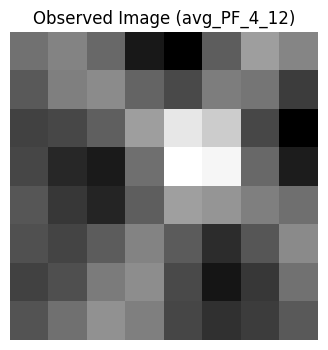

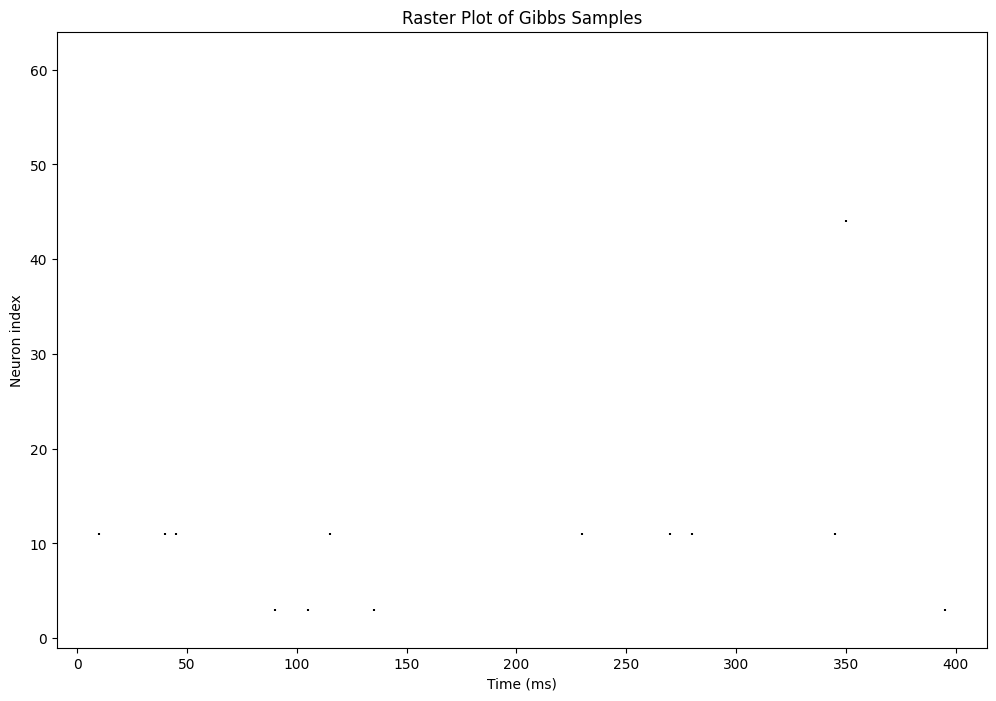

In [ ]:
avg_PF_4_12 = (PFs[3]+PFs[11])/2
plt.figure(figsize=(4,4))
plt.imshow(avg_PF_4_12.reshape(8,8), cmap='gray')
plt.title("Observed Image (avg_PF_4_12)")
plt.axis('off')
plt.show()

r_samples_4_12, I_obs = run_test_with_pf(PFs, avg_PF_4_12, 100)
plot_raster(r_samples_4_12)

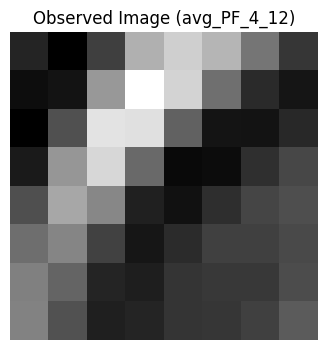

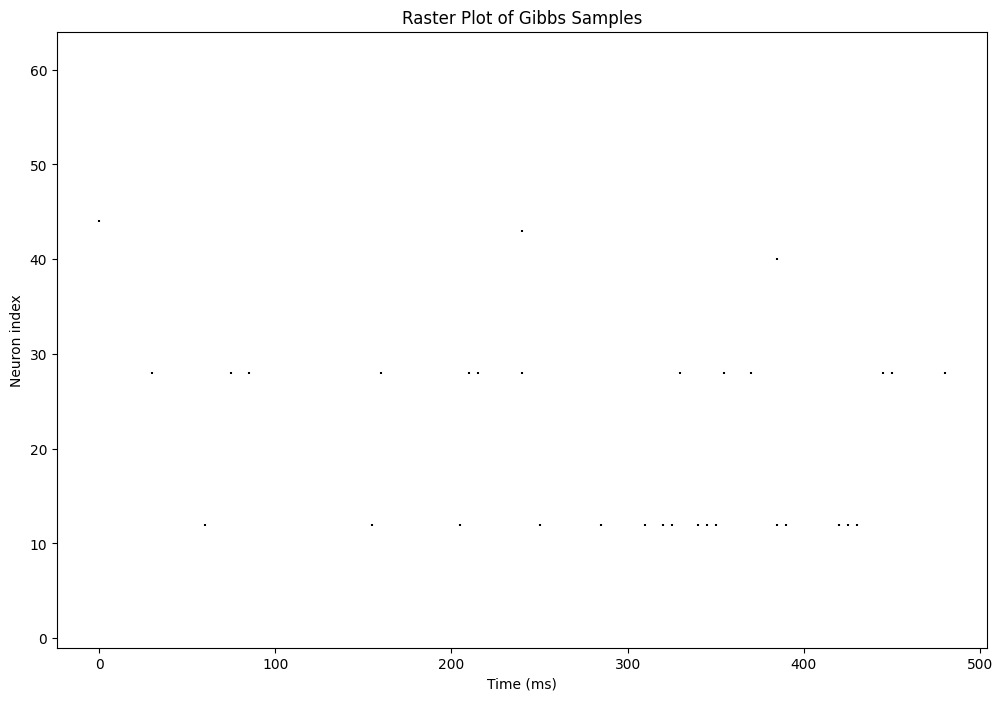

In [ ]:
avg_PF_13_29 = (PFs[12]+PFs[28])/2
plt.figure(figsize=(4,4))
plt.imshow(avg_PF_13_29.reshape(8,8), cmap='gray')
plt.title("Observed Image (avg_PF_4_12)")
plt.axis('off')
plt.show()

r_samples_13_29, I_obs = run_test_with_pf(PFs, avg_PF_13_29, 100)
plot_raster(r_samples_13_29)

Both of the raster plots are not what I expected since they only spike infrequently. I did expect there to be higher spiek counts in the two projective fields that were averaged and this does happen. The first image has less frequent spike counts than the second, but I do not have an explnation for this.

b.)

Just take the dot product of the projective fields and the marginals.

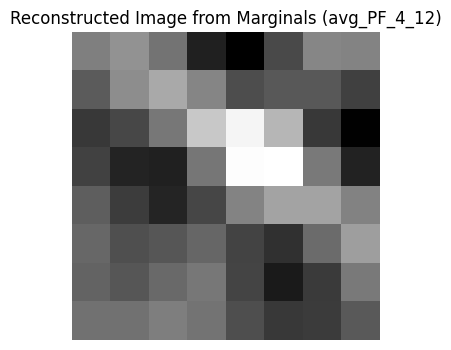

In [ ]:
marginals_4_12 = compute_marginal_posterior(r_samples_4_12)
n_neurons = PFs.shape[0]
n_pixels_flat = PFs.shape[1] * PFs.shape[2]
PFs_flat = PFs.reshape(n_neurons, n_pixels_flat)
I_reconstructed = np.dot(marginals_4_12, PFs_flat).reshape(PFs.shape[1], PFs.shape[2])

plt.figure(figsize=(4,4))
plt.imshow(I_reconstructed, cmap='gray')
plt.title("Reconstructed Image from Marginals (avg_PF_4_12)")
plt.axis('off')
plt.show()

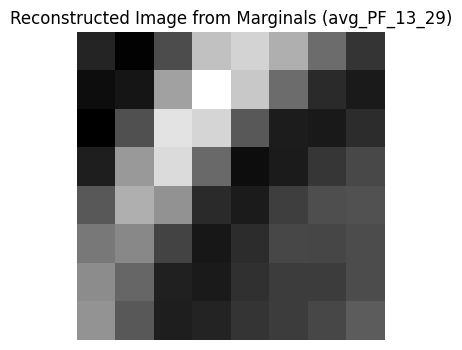

In [ ]:
marginals_13_29 = compute_marginal_posterior(r_samples_13_29)
n_neurons = PFs.shape[0]
n_pixels_flat = PFs.shape[1] * PFs.shape[2]
PFs_flat = PFs.reshape(n_neurons, n_pixels_flat)
I_reconstructed = np.dot(marginals_13_29, PFs_flat).reshape(PFs.shape[1], PFs.shape[2])

plt.figure(figsize=(4,4))
plt.imshow(I_reconstructed, cmap='gray')
plt.title("Reconstructed Image from Marginals (avg_PF_13_29)")
plt.axis('off')
plt.show()

They match up very well, to me they are very close to the input image.

c.)

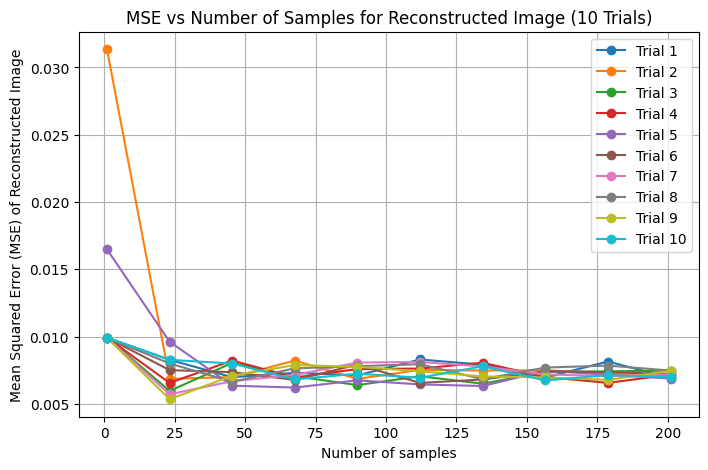

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

avg_PF_4_12 = (PFs[3] + PFs[11]) / 2
num_trials = 10
num_samples = np.linspace(1, 201, 10)

plt.figure(figsize=(8, 5))

for trial in range(num_trials):
    MSE = []
    for i in num_samples:
        n_samples_gibbs = int(i)
        r_samples, I_obs = run_test_with_pf(PFs, avg_PF_4_12, n_samples_gibbs)
        r_marginal = compute_marginal_posterior(r_samples)

        n_neurons = PFs.shape[0]
        n_pixels_flat = PFs.shape[1] * PFs.shape[2]
        PFs_flat = PFs.reshape(n_neurons, n_pixels_flat)
        I_reconstructed = np.dot(r_marginal, PFs_flat).reshape(PFs.shape[1], PFs.shape[2])

        MSE.append(np.mean((I_reconstructed - avg_PF_4_12)**2))

    plt.plot(num_samples, MSE, marker='o', label=f'Trial {trial+1}')

plt.xlabel('Number of samples')
plt.ylabel('Mean Squared Error (MSE) of Reconstructed Image')
plt.title('MSE vs Number of Samples for Reconstructed Image (10 Trials)')
plt.grid(True, which='both')
plt.legend()
plt.show()


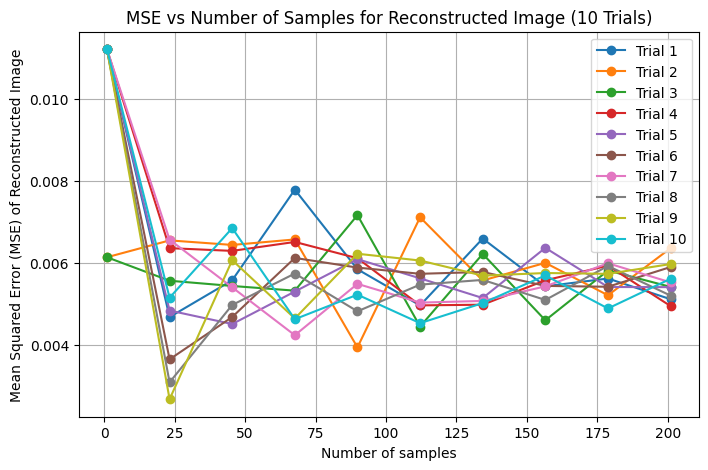

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

avg_PF_13_29 = (PFs[12] + PFs[28]) / 2
num_trials = 10
num_samples = np.linspace(1, 201, 10)

plt.figure(figsize=(8, 5))

for trial in range(num_trials):
    MSE = []
    for i in num_samples:
        n_samples_gibbs = int(i)
        r_samples, I_obs = run_test_with_pf(PFs, avg_PF_13_29, n_samples_gibbs)
        r_marginal = compute_marginal_posterior(r_samples)

        n_neurons = PFs.shape[0]
        n_pixels_flat = PFs.shape[1] * PFs.shape[2]
        PFs_flat = PFs.reshape(n_neurons, n_pixels_flat)
        I_reconstructed = np.dot(r_marginal, PFs_flat).reshape(PFs.shape[1], PFs.shape[2])

        MSE.append(np.mean((I_reconstructed - avg_PF_13_29)**2))

    plt.plot(num_samples, MSE, marker='o', label=f'Trial {trial+1}')

plt.xlabel('Number of samples')
plt.ylabel('Mean Squared Error (MSE) of Reconstructed Image')
plt.title('MSE vs Number of Samples for Reconstructed Image (10 Trials)')
plt.grid(True, which='both')
plt.legend()
plt.show()


I expected there to be a more gradual approach to what seems to be a minimum error over the time steps, but it seems that the number of samples it takes to represent these input images well is low. This may be because they are just hte input of two projective fields averaged and not a more complex image with respect to the basis of projective fields and so it takes less iterations to converge to a good distribution.

Question 7.)

a.)

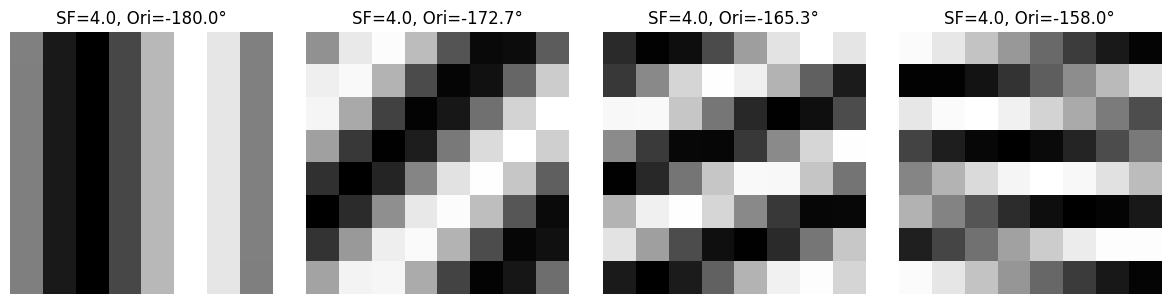

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

orientations = np.linspace(-np.pi, np.pi, 50)
spatial_frequencies = [4.0, 2.0, 1.0]
contrast = 0.2
img_size = 8

def generate_grating(spatial_frequency, orientation, contrast, size=img_size):

    x = np.linspace(-1, 1, size)
    y = np.linspace(-1, 1, size)
    X, Y = np.meshgrid(x, y)

    phi = 2 * np.pi * spatial_frequency * (X * np.cos(orientation) + Y * np.sin(orientation))

    grating = contrast * np.sin(phi)
    return grating


gratings = {}
for sf in spatial_frequencies:
    for ori in orientations:
        gratings[(sf, ori)] = generate_grating(sf, ori, contrast, size=img_size)

example_key = list(gratings.keys())[0]
plt.figure(figsize=(12, 3))
for i, key in enumerate(list(gratings.keys())[:4]):
    plt.subplot(1, 4, i+1)
    plt.imshow(gratings[key], cmap='gray')
    plt.title(f'SF={key[0]}, Ori={np.degrees(key[1]):.1f}°')
    plt.axis('off')
plt.tight_layout()
plt.show()


Simulate a neurophysiology experiment in which you show each image 50 times for 500ms each. Com-
pute the average firing rate across the 50 trials for each stimulus. Plot the orientation tuning curve for
each neuron in the same format in which you displayed all projective fields (three lines in each subplot,
one for each spatial frequency; use different colors). Compare each tuning curve to its corresponding
projective field. Which features of the projective field determine tuning curve amplitude and preferred
orientation? Is there a latent with weak orientation tuning but clearly oriented projective field? If so,
how can this happen?

In [ ]:
avg_firing_rates = np.zeros((64, len(spatial_frequencies), len(orientations)))

for sf_idx, sf in enumerate(spatial_frequencies):
    for ori_idx, ori in enumerate(orientations):
        grating = gratings[(sf, ori)]

        r_samples, I_obs = run_test_with_pf(PFs, grating, 100)

        avg_firing_rates[:, sf_idx, ori_idx] = np.mean(r_samples, axis=0)

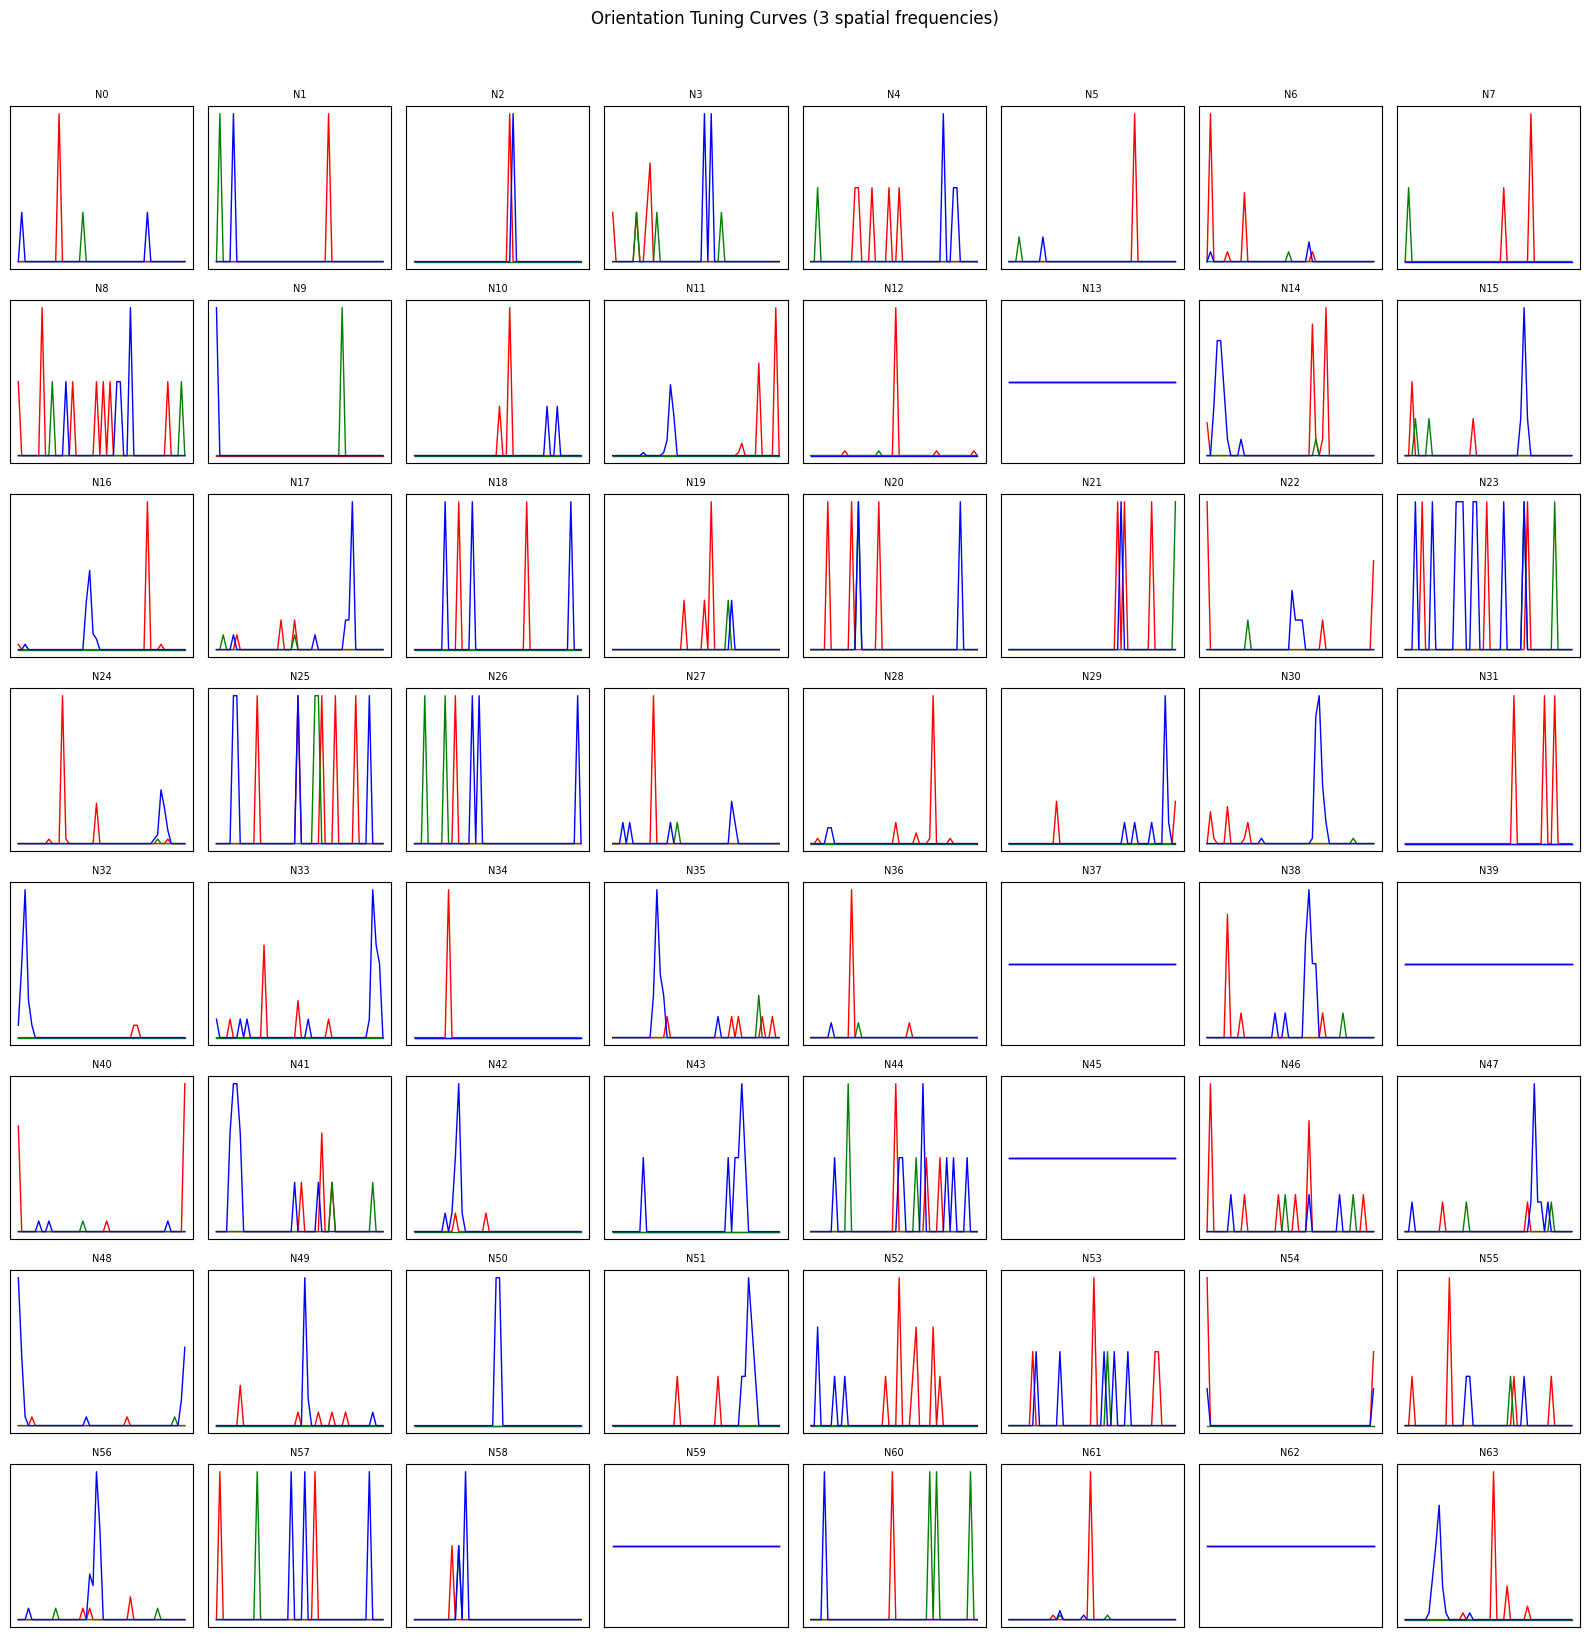

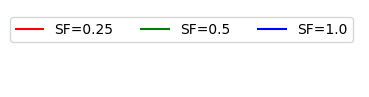


Neuron | Max tuning amplitude | Preferred orientations (per SF)
  0   | 0.0300              | -91.8, -40.4, -172.7
  1   | 0.0100              | 62.4, -172.7, -143.3
  2   | 0.0100              | 25.7, -180.0, 33.1
  3   | 0.0300              | -99.2, -128.6, 18.4
  4   | 0.0200              | -84.5, -165.3, 106.5
  5   | 0.0600              | 91.8, -158.0, -106.5
  6   | 0.1500              | -172.7, -3.7, 40.4
  7   | 0.0200              | 91.8, -172.7, -180.0
  8   | 0.0200              | -128.6, -106.5, 62.4
  9   | 0.0100              | -180.0, 91.8, -180.0
 10   | 0.0300              | 25.7, -180.0, 106.5
 11   | 0.4800              | 172.7, -180.0, -55.1
 12   | 0.3100              | 3.7, -33.1, -180.0
 13   | 0.0000              | -180.0, -180.0, -180.0
 14   | 0.0900              | 77.1, 55.1, -158.0

Weakly tuned neurons (bottom 10% of tuning amplitude): [ 1  2  9 13 18 20 21 23 25 26 31 34 37 39 45 57 59 60 62]


In [ ]:
import math

colors = ['r', 'g', 'b']
sf_labels = ['SF=0.25', 'SF=0.5', 'SF=1.0']

num_neurons = avg_firing_rates.shape[0]
cols = 8
rows = math.ceil(num_neurons / cols)

plt.figure(figsize=(cols*2, rows*2))

for n in range(num_neurons):
    ax = plt.subplot(rows, cols, n+1)
    for sf_idx in range(len(spatial_frequencies)):
        ax.plot(
            np.degrees(orientations),
            avg_firing_rates[n, sf_idx, :],
            color=colors[sf_idx],
            linewidth=1
        )
    ax.set_title(f'N{n}', fontsize=7)
    ax.set_xticks([])
    ax.set_yticks([])

plt.suptitle("Orientation Tuning Curves (3 spatial frequencies)", y=1.02)
plt.tight_layout()
plt.show()

plt.figure(figsize=(4,1))
for c, label in zip(colors, sf_labels):
    plt.plot([], [], color=c, label=label)
plt.legend(ncols=3)
plt.axis('off')
plt.show()


The amplitude of the tuning curve is determined by how strongly the orientation adn frequency math the sin wave gratings. The fields with oreientated and high contrast produce large tuning amplitudes.

Take the 63 projective field. The orientation curve is flat but it clearly has structure and is oriented. This being said the graidnet does not change fast. This could also happen if it had small magnitude or if its spatial frequency does not match the frequencies of the tested gratings.